# Decision Trees

_source: oreilly: hands on machine learning with scikit learn and tensorflow_

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

**Decision  Trees**  are  versatile  Machine  Learning  algorithms  that  can  per‐form  both  **classification  and  regression**  tasks,  and  even  **multioutput**  tasks.  They  arevery powerful algorithms, capable of fitting complex datasets.

# Training and visualizing

To understand Decision Trees, let’s just build one and take a look at how it makes predictions. 

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

You  can  visualize  the  trained  Decision  Tree  by  first  using  the  export_graphviz()method to output a graph definition file called *iris_tree.dot*

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Then you can convert this .dot file to a variety of formats such as PDF or PNG usingthe dot command-line tool from the graphviz package.1 This command line convertsthe .dot file to a .png image file:
$ dot -Tpng iris_tree.dot -o iris_tree.png

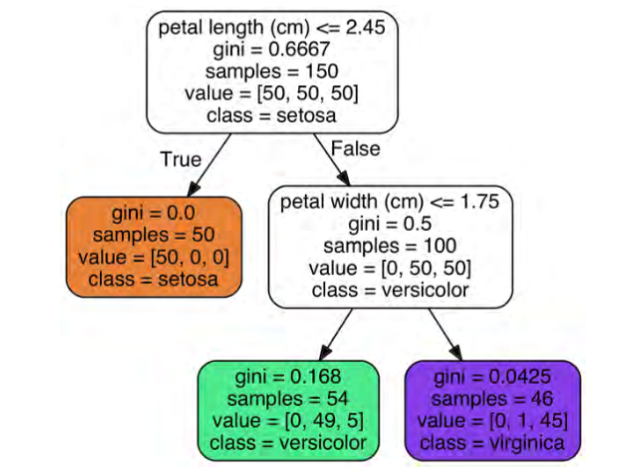

- A node’s  samples  attribute  counts  how  many  training  instances  it  applies  to
- A node’s  value  attribute  tells  you  how  many  training  instances  of  each  class  this  node applies
- a  node’s  gini  attribute  measures  its  impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the sameclass. 
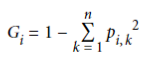
p(i,k) is the ratio of class k instances among the training instances in the ith node.
Gini  impurity  is  slightly  faster  to compute than entropy,  so  it  is  a  good  default.  However,  when  they  differ,  Gini  impurity  tends  to isolate  the  most  frequent  class  in  its  own  branch  of  the  tree,  while  entropy  tends  to produce slightly more balanced trees

Saving figure decision_tree_decision_boundaries_plot


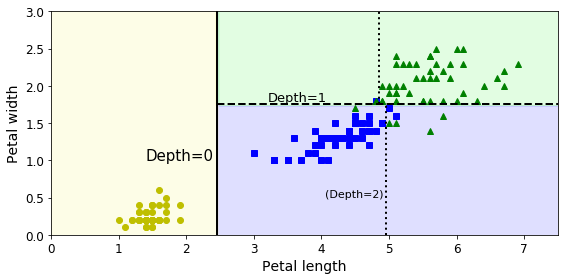

In [6]:

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Predicting classes and class probabilities
the  ratio  of  training  instances  of  class  k  in  the  node an instance belongs to.

In [11]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

In [9]:
iris.target_names[1]

'versicolor'

# Feature Importance 
The feature importances always sum to one

In [12]:
clf_all = DecisionTreeClassifier(random_state=42)
clf_all.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

[0.01333333 0.         0.56405596 0.42261071]


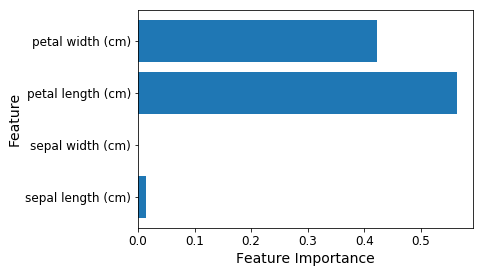

In [13]:
print(clf_all.feature_importances_)
import numpy as np
n_features = iris.data.shape[1]
plt.barh(range(n_features), clf_all.feature_importances_, align='center')
plt.yticks(np.arange(n_features), iris.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Algorithm
Scikit-Learn  uses  the  _Classification  And  Regression  Tree  **(CART)**_  algorithm  to  train Decision Trees (also called “growing” trees).
- the algorithm  first  splits  the  training  set  in  two  subsets  using  a  single  feature  k  and  a  threshold tk by searching  for the pair (k, tk) that produces the purest subsets (weighted by their size).
- repeat this setp on each node recursively. 

It stops recursing once it reaches the maximum depth (defined by the *max_depth* hyperparameter), or if it cannot find  a  split  that  will  reduce  impurity.  A  few  other  hyperparameters  control   additional   stopping   conditions   (*min_samples_split,   min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes*)

# Regularization Hyperparameters
To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called regularization. This is done by restricting the  maximum  depth  of  the  Decision  Tree.  

Example: Moon dataset


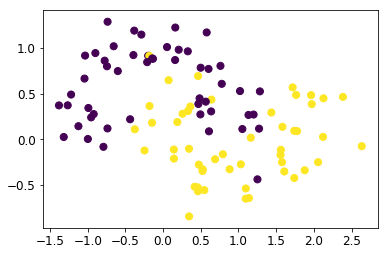

In [14]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)
plt.scatter(Xm[:, 0], Xm[:, 1], c=ym, s=50);

No restrictions training score = 1.0
min_samples_leaf =4, training score = 0.96
Saving figure min_samples_leaf_plot


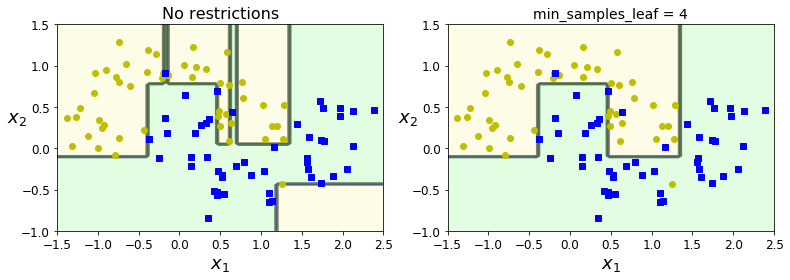

In [15]:
#  trained with the default hyperparameters(i.e.,  no  restrictions),
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
# trained  with  min_samples_leaf=4.
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

deep_tree_clf1.fit(Xm, ym)
print("No restrictions training score = {}".format(deep_tree_clf1.score(Xm, ym)))
deep_tree_clf2.fit(Xm, ym)
print("min_samples_leaf ={}, training score = {}".format(deep_tree_clf2.min_samples_leaf,deep_tree_clf2.score(Xm, ym)))


plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

# Limitations of Decsion Trees
- Instability: DecisionTrees  love  orthogonal  decision  boundaries  (all  splits  are  perpendicular  to  an  axis),which makes them sensitive to training set rotation.

Saving figure sensitivity_to_rotation_plot


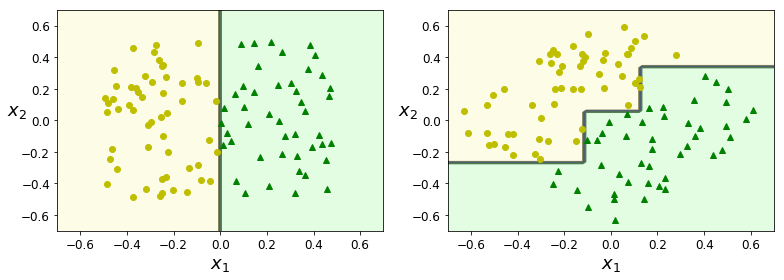

In [16]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()

(Although both Decision Trees fit the training set perfectly, it is very likely that the model on the right will not generalize well)
 One way to limit this prob‐lem  is  to  use  *PCA*,  which  often  results  in  a  better  orientation  of  the training data
 
- **Decision  Trees  is  that  they  are  very  sensitive  to small variations in the training data**. For example, if you just remove the widest Iris-Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new Decision Tree, you may get the model represented that  looks  very  different  from  the  previous  Decision  Tree. 


In [17]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [18]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

Saving figure decision_tree_instability_plot


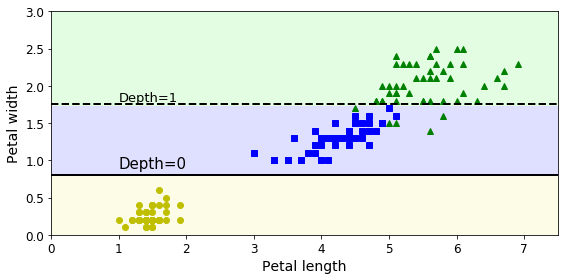

In [19]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

Random Forests can limit this instability by averaging predictions over many trees

# Regression trees

- This tree looks very similar to the classification tree you built earlier. The main difference is that instead of predicting a class in each node, it predicts a value.
- It finds the  leaf  node  that  predicts simply  the  average  target  value  of  the training instances associated to the leaf node.

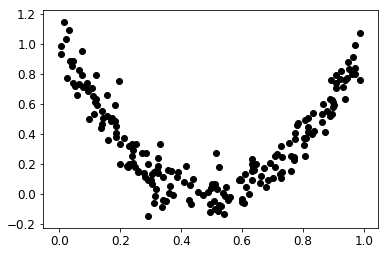

In [20]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

plt.scatter(X, y,  color='black')
plt.show()

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [22]:
export_graphviz(
        tree_reg,
        out_file=image_path("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

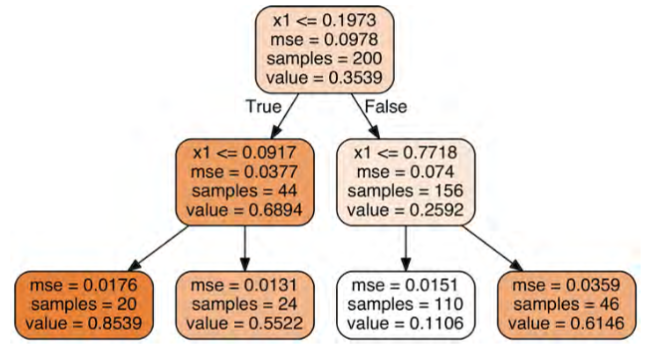

The algorithm splits each region in a way that makes most training instancesas close as possible to that predicted value

Saving figure tree_regression_plot


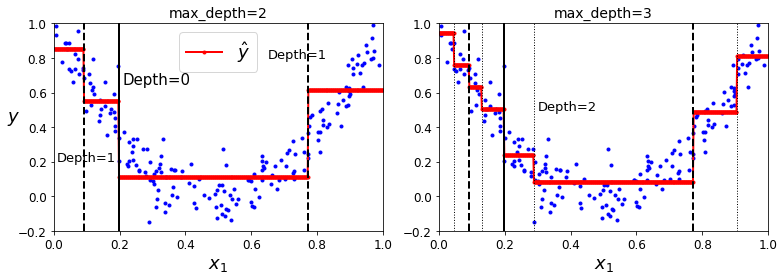

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

The *CART* tries to split thetraining  set  in  a  way  that  minimizes  the  MSE. 

# Overfitting
 Decision Trees are prone to overfitting when dealing with  regression  tasks.
 use regularization (i.e.,  using  the  default  hyperpara‐meters), 

Saving figure tree_regression_regularization_plot


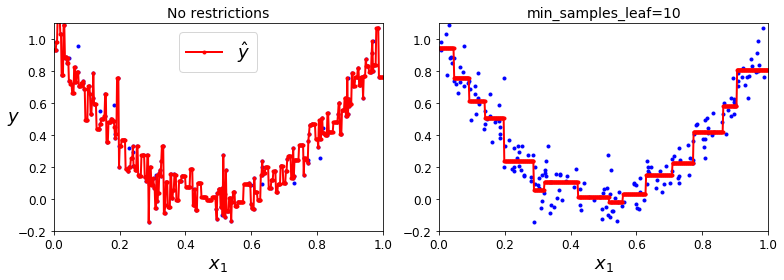

In [24]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()